# Auto Scout Price Estimation Project with Different Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('car.csv')

In [3]:
df

,price,Nr_of_Doors3,Comfort_point3,Nr_of_Seats3,Safety_point3,Entertainment_point3,age3,Extras_point3,Gears3,Cylinders3,...,Body_Color3_White,Body_Color3_Yellow,Upholstery3_Cloth,Upholstery3_Full leather,Upholstery3_Part leather,vat3_Price negotiable,vat3_VAT deductible,Drive_chain3_4WD,Drive_chain3_front,Drive_chain3_rear
0,15770,5.0,16.0,5.0,14.0,4.0,3.917808,3.0,6.0,3.0,...,0,0,1,0,0,0,1,0,1,0
1,14500,3.0,9.0,4.0,15.0,5.0,2.753425,4.0,7.0,4.0,...,0,0,1,0,0,1,0,0,1,0
2,14640,4.0,13.0,4.0,12.0,2.0,3.832877,2.0,6.0,3.0,...,0,0,1,0,0,0,1,0,1,0
3,14500,3.0,16.0,4.0,14.0,8.0,3.334247,3.0,6.0,3.0,...,0,0,1,0,0,0,1,0,1,0
4,16790,5.0,13.0,5.0,13.0,7.0,3.586301,4.0,6.0,3.0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,39950,5.0,20.0,5.0,19.0,6.0,0.757361,2.0,6.0,4.0,...,0,0,0,1,0,0,1,0,1,0
15915,39885,5.0,23.0,5.0,19.0,5.0,0.915068,3.0,7.0,4.0,...,0,0,1,0,0,0,1,0,1,0
15916,39875,5.0,24.0,7.0,18.0,4.0,0.753425,1.0,6.0,4.0,...,1,0,0,1,0,0,1,0,1,0
15917,39700,5.0,10.0,7.0,12.0,4.0,0.501370,2.0,6.0,4.0,...,0,0,0,0,1,0,1,0,1,0


In [4]:
df.columns

Index(['price', 'Nr_of_Doors3', 'Comfort_point3', 'Nr_of_Seats3',
       'Safety_point3', 'Entertainment_point3', 'age3', 'Extras_point3',
       'Gears3', 'Cylinders3', 'Consump_country3', 'Consump_city3',
       'Consump_comb3', 'CO2_Emission3', 'Weight3', 'hp3', 'km3', 'make3_Audi',
       'make3_Opel', 'make3_Renault', 'model3_A1', 'model3_A2', 'model3_A3',
       'model3_Astra', 'model3_Clio', 'model3_Corsa', 'model3_Duster',
       'model3_Espace', 'model3_Insignia', 'Gearing_Type3_Automatic',
       'Gearing_Type3_Manual', 'Gearing_Type3_Semi-automatic', 'Fuel3_Diesel',
       'Fuel3_Electric', 'Fuel3_Gasoline', 'Fuel3_LPG/CNG',
       'Type3_Demonstration', 'Type3_Employee's car', 'Type3_New',
       'Type3_Pre-registered', 'Type3_Used', 'body_type3_Compact',
       'body_type3_Convertible', 'body_type3_Coupe', 'body_type3_Off-Road',
       'body_type3_Other', 'body_type3_Sedans', 'body_type3_Station wagon',
       'body_type3_Transporter', 'body_type3_Van', 'Body_Color3_Beige'

In [5]:
#sns.pairplot(df)

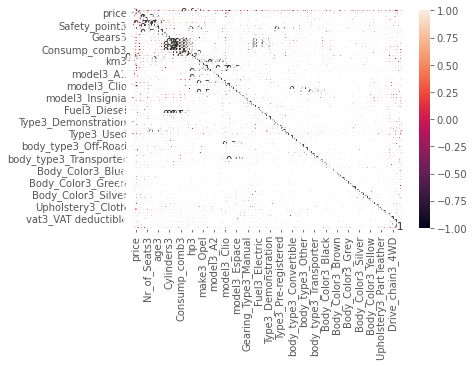

In [8]:
sns.heatmap(df.corr(), annot=True);

In [9]:
df.columns[1:]

Index(['Nr_of_Doors3', 'Comfort_point3', 'Nr_of_Seats3', 'Safety_point3',
       'Entertainment_point3', 'age3', 'Extras_point3', 'Gears3', 'Cylinders3',
       'Consump_country3', 'Consump_city3', 'Consump_comb3', 'CO2_Emission3',
       'Weight3', 'hp3', 'km3', 'make3_Audi', 'make3_Opel', 'make3_Renault',
       'model3_A1', 'model3_A2', 'model3_A3', 'model3_Astra', 'model3_Clio',
       'model3_Corsa', 'model3_Duster', 'model3_Espace', 'model3_Insignia',
       'Gearing_Type3_Automatic', 'Gearing_Type3_Manual',
       'Gearing_Type3_Semi-automatic', 'Fuel3_Diesel', 'Fuel3_Electric',
       'Fuel3_Gasoline', 'Fuel3_LPG/CNG', 'Type3_Demonstration',
       'Type3_Employee's car', 'Type3_New', 'Type3_Pre-registered',
       'Type3_Used', 'body_type3_Compact', 'body_type3_Convertible',
       'body_type3_Coupe', 'body_type3_Off-Road', 'body_type3_Other',
       'body_type3_Sedans', 'body_type3_Station wagon',
       'body_type3_Transporter', 'body_type3_Van', 'Body_Color3_Beige',
       

In [10]:
df.shape

(15919, 72)

In [11]:
column_list = list(df.columns[1:])

In [12]:
type(column_list)

list

In [13]:
X = df[column_list]

In [14]:
X

,Nr_of_Doors3,Comfort_point3,Nr_of_Seats3,Safety_point3,Entertainment_point3,age3,Extras_point3,Gears3,Cylinders3,Consump_country3,...,Body_Color3_White,Body_Color3_Yellow,Upholstery3_Cloth,Upholstery3_Full leather,Upholstery3_Part leather,vat3_Price negotiable,vat3_VAT deductible,Drive_chain3_4WD,Drive_chain3_front,Drive_chain3_rear
0,5.0,16.0,5.0,14.0,4.0,3.917808,3.0,6.0,3.0,3.8,...,0,0,1,0,0,0,1,0,1,0
1,3.0,9.0,4.0,15.0,5.0,2.753425,4.0,7.0,4.0,5.6,...,0,0,1,0,0,1,0,0,1,0
2,4.0,13.0,4.0,12.0,2.0,3.832877,2.0,6.0,3.0,3.8,...,0,0,1,0,0,0,1,0,1,0
3,3.0,16.0,4.0,14.0,8.0,3.334247,3.0,6.0,3.0,3.8,...,0,0,1,0,0,0,1,0,1,0
4,5.0,13.0,5.0,13.0,7.0,3.586301,4.0,6.0,3.0,4.1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,5.0,20.0,5.0,19.0,6.0,0.757361,2.0,6.0,4.0,5.3,...,0,0,0,1,0,0,1,0,1,0
15915,5.0,23.0,5.0,19.0,5.0,0.915068,3.0,7.0,4.0,7.1,...,0,0,1,0,0,0,1,0,1,0
15916,5.0,24.0,7.0,18.0,4.0,0.753425,1.0,6.0,4.0,5.3,...,1,0,0,1,0,0,1,0,1,0
15917,5.0,10.0,7.0,12.0,4.0,0.501370,2.0,6.0,4.0,5.3,...,0,0,0,0,1,0,1,0,1,0


In [15]:
X.shape

(15919, 71)

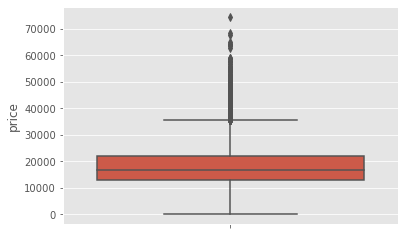

In [16]:
sns.boxplot(df['price'], orient='v')

In [17]:
df[df['price']>40000].count() #/len(df)

price                    160
Nr_of_Doors3             160
Comfort_point3           160
Nr_of_Seats3             160
Safety_point3            160
                        ... 
vat3_Price negotiable    160
vat3_VAT deductible      160
Drive_chain3_4WD         160
Drive_chain3_front       160
Drive_chain3_rear        160
Length: 72, dtype: int64

In [18]:
df['price'].describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [20]:
y = df['price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
X_train.shape

(11143, 71)

In [24]:
y_train.shape

(11143,)

In [25]:
from sklearn.linear_model import LinearRegression

# Different Models

## 1.Linear Regression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train, y_train)

LinearRegression()

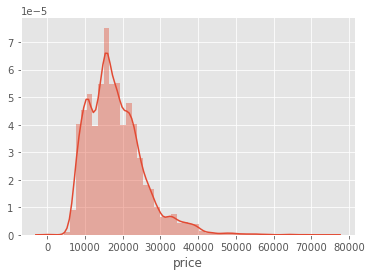

In [31]:
sns.distplot(df['price'])

In [32]:
df['price'].describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [33]:
print(lm.intercept_)

11249.90988724576


In [34]:
lm.coef_

array([ 4.23413219e+02,  1.38742259e+02,  4.75915229e+01, -1.28305952e+01,
       -1.60600106e+02, -1.59963937e+03, -5.78206224e+01,  6.34106738e+02,
        3.17488715e+02,  6.85004302e+02,  9.10874851e+02, -8.70599403e+02,
       -2.62121085e+01, -8.66269795e-01,  8.71131621e+01, -4.10642553e-02,
        3.23116384e+03, -1.62319605e+03, -1.60796779e+03, -1.47856142e+03,
        5.17034318e+03, -4.60617916e+02, -9.44909258e+02, -2.27901103e+03,
       -2.30137863e+03, -5.53011398e+03,  6.20115722e+03,  1.62309183e+03,
       -5.22431230e+02, -1.97798702e+03,  2.50041825e+03, -8.63320791e+02,
        3.64204173e+03, -1.63406578e+03, -1.14465516e+03,  2.20276744e+03,
       -1.42034402e+03,  9.62638358e+02, -7.13287750e+02, -1.03177402e+03,
       -9.42627802e+02,  7.98834880e+03, -3.82798760e+02, -7.09837211e+02,
       -1.77887847e+03, -8.37932828e+02, -7.19581341e+02, -2.99619588e+03,
        3.79503492e+02,  3.35747914e+02,  1.32293915e+03,  1.27626629e+03,
        2.17355571e+03,  

In [35]:
pd.DataFrame(lm.coef_, X.columns, columns= ['Coeff'])

,Coeff
Nr_of_Doors3,423.413219
Comfort_point3,138.742259
Nr_of_Seats3,47.591523
Safety_point3,-12.830595
Entertainment_point3,-160.600106
...,...
vat3_Price negotiable,-107.870425
vat3_VAT deductible,107.870425
Drive_chain3_4WD,2336.523947
Drive_chain3_front,15.743304


In [36]:
predictions = lm.predict(X_test)

In [37]:
predictions

array([21392.09800794, 17179.91965999, 13775.49050126, ...,
       19917.47385498, 12653.39797519, 16585.90424142])

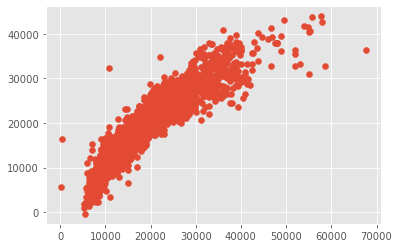

In [40]:
plt.scatter(y_test, predictions);

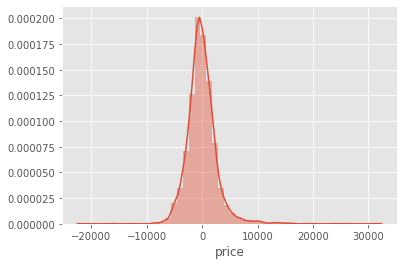

In [41]:
sns.distplot((y_test - predictions));

In [42]:
from sklearn import metrics

In [43]:
print('MAE : {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE : {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE : 1884.8336725332165
MSE : 7421743.869175531
RMSE: 2724.2877728271533


In [44]:
lm.score(X,y) * 100

86.32045117116611

In [45]:
lm.score(X_train,y_train) * 100

86.48061173798249

In [46]:
lm.score(X_test,y_test) * 100

85.92217162837754

## 2. Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, mean_absolute_error

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [49]:
rf_model = RandomForestRegressor().fit(X_train, y_train)

In [50]:
y_pred = rf_model.predict(X_test)

In [51]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [52]:
eval_metrics(y_test, y_pred)

r2_score: 0.9496035886706233 
 mae: 921.879302221336 
 mse: 2743814.6527340286 
 rmse: 1656.4463929551202


### Scaling Data

In [53]:
from sklearn.preprocessing import scale, StandardScaler

In [54]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [55]:
rf_model_s = RandomForestRegressor().fit(X_train_s, y_train)

In [56]:
y_pred_s = rf_model_s.predict(X_test_s)

In [57]:
eval_metrics(y_test, y_pred_s)

r2_score: 0.9480746981442644 
 mae: 922.028850680688 
 mse: 2827054.5525203967 
 rmse: 1681.3847128246398


In [58]:
X_train.head()

,Nr_of_Doors3,Comfort_point3,Nr_of_Seats3,Safety_point3,Entertainment_point3,age3,Extras_point3,Gears3,Cylinders3,Consump_country3,...,Body_Color3_White,Body_Color3_Yellow,Upholstery3_Cloth,Upholstery3_Full leather,Upholstery3_Part leather,vat3_Price negotiable,vat3_VAT deductible,Drive_chain3_4WD,Drive_chain3_front,Drive_chain3_rear
2879,5.0,14.0,5.0,17.0,6.0,3.753425,3.0,7.0,4.0,3.8,...,0,0,1,0,0,0,1,0,1,0
12881,5.0,6.0,5.0,6.0,5.0,0.753425,1.0,6.0,4.0,5.4,...,0,0,1,0,0,0,1,0,1,0
13148,5.0,8.0,5.0,10.0,5.0,1.583874,1.0,6.0,4.0,3.5,...,0,0,1,0,0,0,1,0,1,0
1665,5.0,13.0,5.0,16.0,6.0,1.501370,3.0,7.0,3.0,4.0,...,0,0,1,0,0,0,1,0,1,0
12147,5.0,17.0,5.0,15.0,5.0,0.757361,3.0,6.0,4.0,5.0,...,0,0,1,0,0,0,1,0,1,0


In [59]:
X_train_s[:2]

array([[ 0.52828712,  0.2878983 ,  0.10281375,  1.06379665,  0.67478707,
         1.59233889,  0.36925698,  1.70113719,  0.47097467, -1.23157939,
        -1.19325955, -1.21824159, -1.16437636,  0.01240082, -0.28815172,
         0.25630331,  1.33665705, -0.9217772 , -0.47134797, -0.44499939,
         0.        ,  2.04115864, -0.43252808, -0.36442496, -0.39913425,
        -0.04523046, -0.2582097 , -0.44347893,  1.08692122, -1.0240826 ,
        -0.17489983,  1.08400371, -0.01535014, -1.07581486, -0.05954913,
        -0.22698768, -0.26182393, -0.3389041 , -0.30502332,  0.65667381,
        -0.49754491, -0.02345141, -0.03966037, -0.05888144, -0.13531892,
         1.00117855, -0.53415821, -0.07645077, -0.23135288, -0.08530389,
        -0.5723028 , -0.31641893, -0.0198185 , -0.13591942, -0.00886171,
        -0.09753197,  1.8006032 , -0.01535014, -0.25051062, -0.34234962,
        -0.03317442, -0.53500814, -0.05888144,  0.46586459, -0.30425376,
        -0.32135035, -0.16386125,  0.16386125, -0.1

## 3. XGBOOST

In [61]:
from xgboost import XGBRegressor

In [62]:
xgb_model = XGBRegressor().fit(X_train_s, y_train)

In [63]:
y_pred = xgb_model.predict(X_test_s)

In [64]:
eval_metrics(y_test, y_pred)

r2_score: 0.9495513232731452 
 mae: 989.9991400637219 
 mse: 2746660.223671495 
 rmse: 1657.3051088051031


### GridSearch

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [75]:
xgb_params = {"n_estimators": [500,1000],
             "subsample":[0.1,0.5],
             "max_depth":[10, 30],
             "learning_rate":[0.1,0.01]}

In [76]:
xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv = 5,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 17.0min finished


In [77]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 30,
 'n_estimators': 1000,
 'subsample': 0.5}

In [78]:
xgb_tuned = XGBRegressor(learning_rate= 0.01,
                                max_depth= 30,
                                n_estimators= 1000,
                                subsample= .5, booster='dart').fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9613465281631464 
 mae: 827.4962668874156 
 mse: 2104474.4974366557 
 rmse: 1450.6807014076721


## PCA

In [81]:
sc = StandardScaler()
X = sc.fit_transform(X)
#X_test_s = sc.transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca.shape)
print(X_pca[:2])

(15919, 2)
[[-3.1751009   2.17172895]
 [-0.05333761  0.03706185]]


In [85]:
pca.explained_variance_ratio_.cumsum()

array([0.10440129, 0.1809059 ])

Text(0, 0.5, 'Variance Ratio')

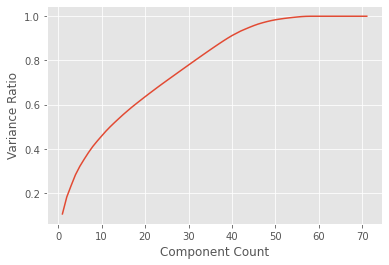

In [87]:
pca = PCA().fit(X)
x = range(1,72)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component Count')
plt.ylabel('Variance Ratio')